<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Exception Handling</h1>
</div>
<br>

Until now you have probably strumbled across several **error messages** when you wrote Python code. In general, these error messages are divided into two categories: 

- First, there are **syntax errors**, which indicate that at some point in your code you used an **invalid command**, e.g. you forgot an indent or wrote a colon too much. The interpreter checks for these syntax errors before you code is actually executed. But we do not want to go into detail here. 
- Instead, we want to discuss the second category of error messages. These error messages are problems which the interpreter encounters when it actually executes your code. These errors are also called **exceptions**. By default, they are **fatal** and stop your program immediately when the exception occurs. 

In the following is a list of common exceptions: 

| Exception | Cause |
| -------- | ------- |
| Attribute Error | Raised when attribute assignment or reference fails |
| Import Error | Raised when the imported module is not found |
| Index Error | Raised when index of a sequence is out of range |
| KeyError | Raised when a key is not found in a dictionary | 
| Keyboard Interrupt | Raised when the user hits interrupt key(Ctrl + C or Delete) |
| Memory Error | Raised when an operation runs out of memory | 
| Name Error | Raised when a variable is not found in local or global scope | 
| Syntax Error | Raised by parser when syntax error is encountered |
| IndentationError | Raised when there is incorrect indentation | 
| Type Error | Raised when a function or operation is applied to an object of incorrect type | 
| Value Error | Raised when a function gets argument of correct type but improper value |
| Zero Division Error | Raised when second operand of division or modulo operation is zero |

If you are working with data streams, e.g. from websites and APIs, it is advisable that you take certain **errors** into **account** such that not the whole program aborts because of an **unimportant detail** in the data stream. Besides the data stream itself, there is an endless number of potential causes for errors. 

In these cases, we wrap our code with a `try` **statement**, and catch a possible **exception** with an `except` statement. You can also catch **multiple exceptions** at the same time by adding underneath more `except` statements. If you want to have the respective **message** of the exception available in the `exception` block give it a **variable name**, like in the `with` statement. If you use a `finally` **statement** at the end of your `try` statement, the **clause** inside the `finally` statement will be **executed last**, whether or not the `try` statement raised an exception. 

Let us **catch** some trivial **exceptions**. 

In [ ]:
# error prone code
size = len(w)

NameError: name 'w' is not defined

In [ ]:
try:
    # error prone code
    size = len(x)
except NameError as e:
    # report name error
    print(f"Got error: {e}")

Got error: name 'x' is not defined


In [ ]:
try: 
    # error prone code
    y = 12
    size = len(y)
except NameError as e:
    # report name error
    print(f"Got name error: {e}")
except TypeError as e:
    # report type error
    print(f"Got type error: {e}")

Got type error: object of type 'int' has no len()


In [ ]:
try: 
    # error prone code
    size = len(z)
except NameError as e:
    # report name error
    print(f"Got name error: {e}")
except TypeError as e:
    # report type error
    print(f"Got type error: {e}")
finally:
    # report finished block
    print("Finished try block")

Got name error: name 'z' is not defined
Finished try block


Please keep in mind, however, that you should not **abuse** `try` statements to make **poor code** run, but only to deal with **unavoidable problems**. This is also the reason why we have not introduced exception handling earlier on. 

***
<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Sentiment Analysis</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Ey you?! Yes, you! I am your mother!</h4>
</div>
<br>

Today's topic is Sentiment Analysis. This is the approach of using natural language processing and text analysis to quantitatively analyze the sentiment of given documents. You can think of it as giving a piece of text or multiple texts to someone and asking them to tell you which emotions are conveyed in the given text(s) except that you are not giving the text(s) to a human but to a machine.<br>
At the basic level this analysis is only about detecting positive, negative, or neutral sentimental valence. An example for this rather simple method of sentiment analysis would be the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer which will be introduced further down.<br>
Something a bit more advanced would be the identification of specific emotions like anger, hate, sadness, or joy. This can be done with LEIA (Linguistic Embeddings for the Identification of Affect).

Now, you might ask why sentiment analysis might be important. Simple example: Think of product reviews... Nobody wants to read hundreds, thousands of product reviews and keep track of whether people were sad, angry, joyful, or simply neutral about a product. Imagine all the hate you would be subjected to reading this stuff...<br>
So, the solution is pretty simple: Just have your machine do the 'reading'!<br>
Enough talk, let's get down to some analysis:

***
# VADER
## Setup

In [3]:
import pandas as pd

# Sentiment analysis part
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bache\AppData\Roaming\nltk_data...


First we load in the sentiment analyzer. For this we have to download the specific analyzer we wish to use. In our case this is done with `nltk.download('vader_lexicon')`. You don't have to do this every time just once before using the analyzer for the first time. We then import the `SentimentIntensityAnalyzer` class which we will need to perform the actual sentiment analysis.<br>
If you have problems at any point and the explanation given here does not do it for you just check this [link](https://www.nltk.org/howto/sentiment.html) for a tutorial on how to use the nltk VADER sentiment analyzer.

In [4]:
classifier = SentimentIntensityAnalyzer() # Create a classifier

We create an object of the class `SentimentIntesityAnalyzer`. This is used to perform the sentiment analysis on individual texts.

In [5]:
data = ['I hate pineapple!',
        'I am not really sure what to make of our new prime minister',
        'Last night was so hilarious! I wish you would have been there with us...',
        'I do not hate homework',
        'I love my data',
        'Sometimes I feel down when I think about the state of our planet', 
        'When people say "Eat the rich" I am never quite certain whether they really mean to eat them...',
        "Seeing Aragorn completely murder Sauron's forces in The Lord of the Rings brought tears of joy to my face!"]

df = pd.DataFrame(data, columns=['text'])

Next, we need to get our text data into a format that can be analyzed by the classifier. One option would be to create a list of separate texts and feed this to the classifier. Another option would be to input a column of a pandas data frame. Let's have a look at the output:

## Application

In [6]:
for i in data: # using a list
    print(i, '\n', classifier.polarity_scores(i))

I hate pineapple! 
 {'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}
I am not really sure what to make of our new prime minister 
 {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.2912}
Last night was so hilarious! I wish you would have been there with us... 
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7758}
I do not hate homework 
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4585}
I love my data 
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
Sometimes I feel down when I think about the state of our planet 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
When people say "Eat the rich" I am never quite certain whether they really mean to eat them... 
 {'neg': 0.098, 'neu': 0.727, 'pos': 0.174, 'compound': 0.3755}
Seeing Aragorn completely murder Sauron's forces in The Lord of the Rings brought tears of joy to my face! 
 {'neg': 0.266, 'neu': 0.593, 'pos': 0.141, 'compound': -0.5244}


In [7]:
for i in df['text']: # using a df column
    print(i, '\n', classifier.polarity_scores(i))

I hate pineapple! 
 {'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}
I am not really sure what to make of our new prime minister 
 {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.2912}
Last night was so hilarious! I wish you would have been there with us... 
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7758}
I do not hate homework 
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4585}
I love my data 
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
Sometimes I feel down when I think about the state of our planet 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
When people say "Eat the rich" I am never quite certain whether they really mean to eat them... 
 {'neg': 0.098, 'neu': 0.727, 'pos': 0.174, 'compound': 0.3755}
Seeing Aragorn completely murder Sauron's forces in The Lord of the Rings brought tears of joy to my face! 
 {'neg': 0.266, 'neu': 0.593, 'pos': 0.141, 'compound': -0.5244}


As you see the classifier assigned each of our example texts four different scores. A 'neg', 'neu', 'pos', and 'compound' score. You might already have guessed what the first three scores stand for. They hold the information about how negative, neutral, or positive a given text was classified to be. The fourth score, the compound score, is a combination of those three other scores. For general purposes you might consider a negative compound score to indicate an overall negative text, a positive compound score indicates a positive text, and a compound score of 0 indicates a neutral text. ***Note that this definition might vary depending on your specific use case.***

## Evaluation

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

Ok, now that you have seen VADER in action let's talk about evaluating our classifications. Take some time and create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) showing the real and predicted sentiments of our example texts. ***Hint: The cell above tells you which libraries you might want to use for the task. The cell below hints at what you might be missing as of now.***

In [9]:
annotations = ['negative',
              'neutral',
              'positive',
              'neutral',
              'positive',
              'negative',
              'neutral',
              'positive']

df['annotation'] = annotations
df['prediction'] = None

df.head(1)

,text,annotation,prediction
0,I hate pineapple!,negative,None


In [15]:
# Time for action
prediction = []
for i in df['text']: # using a df column
    value = classifier.polarity_scores(i)["compound"]
    if value > 0.2:
        prediction.append("positive")
    elif (value <= 0.2 and value >= -0.2):
        prediction.append("neutral")
    else:
        prediction.append("negative")
prediction

['negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative']

In [17]:
df["prediction"] = prediction
df

,text,annotation,prediction
0,I hate pineapple!,negative,negative
1,I am not really sure what to make of our new p...,neutral,negative
2,Last night was so hilarious! I wish you would ...,positive,positive
3,I do not hate homework,neutral,positive
4,I love my data,positive,positive
5,Sometimes I feel down when I think about the s...,negative,neutral
6,"When people say ""Eat the rich"" I am never quit...",neutral,positive
7,Seeing Aragorn completely murder Sauron's forc...,positive,negative


In [20]:
matrix = confusion_matrix(df["annotation"],df["prediction"])
matrix

array([[1, 1, 0],
       [1, 0, 2],
       [1, 0, 2]])

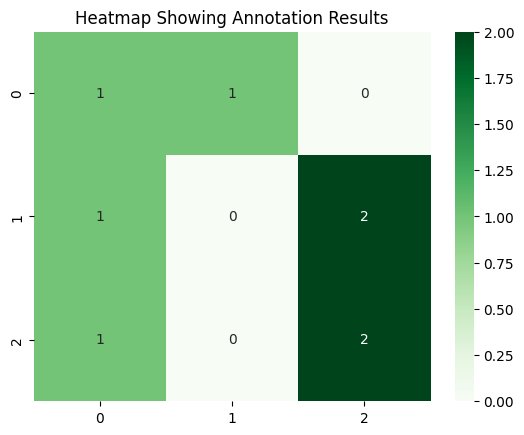

In [22]:
heatmap = sns.heatmap(matrix,annot=True,cmap="Greens")
heatmap.set_title("Heatmap Showing Annotation Results")
heatmap.xaxis.set_label(["negative","neutral","positive"])
heatmap.yaxis.set_label(["negative","neutral","positive"])

## Discussion

Now that we have applied the VADER sentiment analyzer to some texts let's think about possible strengths and weaknesses of our approach. Take a few minutes an try to come up with some pros and cons:

***
# Qick, you need to be my young padawan?

## Parallelism

As of now we have conducted the sentiment analysis on a very small sample of text data only. In pretty much every other scenario you will have to apply the presented method to more than just a few lines of text. Once you do this you will notice that the time it takes for VADER to classify all of your data is going to significantly increase. In order to counter this you can use the [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) library to parallelize the process of sentiment classification. This way your machine will classify multiple texts at once instead of after each other which in turn will significantly reduce your runtime. Of course this heavily depends on the machine you are using. A potato won't be especially fast no matter how well you parallelize your task...<br>
***More on parallelism now***